# Imputing Missing Data with MICE
Mutliple Iterations with Chained Equations

In [127]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../')

from src.visualization import visualize
from src.processing import impute

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap

import seaborn as sns

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import scipy
import math
import statsmodels.api as sm

from datetime import datetime, timedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Import
For each imputation method, we have two datasets we consider:
1. Example data to test the accuracy of the model
2. Remaining participant data that we can apply the model to. 

In [128]:
imp = impute.Impute("rnse61g4","../",prompt=True,consecutive=False)

Percent: 50
Parameter: temperature_c


## Missing Data

In [11]:
imp.missing.head()

,pm2p5_mass,tvoc,temperature_c,rh,co2
timestamp,,,,,
2020-06-11 13:52:00,NaN,123.859636,24.037599,42.064286,1412.201879
2020-06-11 13:54:00,22.796582,126.481339,24.077255,42.061364,1411.594738
2020-06-11 13:56:00,22.721861,129.038577,24.113462,42.058696,1410.994147
2020-06-11 13:58:00,22.634113,131.539410,24.146652,42.056250,1410.628738
2020-06-11 14:00:00,22.695872,133.807650,24.177187,42.054000,1409.933588


## Base Data
Same dataset with nothing missing - to compare against.

In [12]:
imp.base.head()

,tvoc,co,co2,pm1_number,pm2p5_number,pm10_number,pm1_mass,pm2p5_mass,pm10_mass,temperature_c,rh,beiwe
timestamp,,,,,,,,,,,,
2020-06-11 13:52:00,123.859636,10.473964,1412.201879,10.230345,12.524791,32.371648,0.879659,22.713558,3.021592,24.037599,42.064286,rnse61g4
2020-06-11 13:54:00,126.481339,10.238979,1411.594738,10.380728,12.675056,32.564037,0.888913,22.796582,3.027902,24.077255,42.061364,rnse61g4
2020-06-11 13:56:00,129.038577,10.011310,1410.994147,10.216546,12.516024,32.361693,0.879139,22.721861,3.022679,24.113462,42.058696,rnse61g4
2020-06-11 13:58:00,131.539410,9.795315,1410.628738,10.288277,12.547540,32.391885,0.880924,22.634113,3.012363,24.146652,42.056250,rnse61g4
2020-06-11 14:00:00,133.807650,9.595961,1409.933588,10.320498,12.593601,32.454367,0.883814,22.695872,3.018316,24.177187,42.054000,rnse61g4


---

# Imputing

## MICE

In [13]:
imp.mice()

In [14]:
imp.mice_imputed.head()

,pm2p5_mass,tvoc,temperature_c,rh,co2
timestamp,,,,,
2020-06-11 13:52:00,21.510198,123.859636,24.037599,42.064286,1412.201879
2020-06-11 13:54:00,22.796582,126.481339,24.077255,42.061364,1411.594738
2020-06-11 13:56:00,22.721861,129.038577,24.113462,42.058696,1410.994147
2020-06-11 13:58:00,22.634113,131.539410,24.146652,42.056250,1410.628738
2020-06-11 14:00:00,22.695872,133.807650,24.177187,42.054000,1409.933588


## missForest

In [129]:
imp.miss_forest()

In [130]:
imp.rf_imputed.head()

,co2,pm2p5_mass,tvoc,temperature_c,rh
timestamp,,,,,
2020-06-11 13:52:00,1412.201879,22.713558,123.859636,24.037599,42.064286
2020-06-11 13:54:00,1411.594738,22.796582,126.481339,24.138430,42.061364
2020-06-11 13:56:00,1410.994147,22.721861,129.038577,24.113462,42.058696
2020-06-11 13:58:00,1410.628738,22.733882,131.539410,24.146652,42.056250
2020-06-11 14:00:00,1409.933588,22.695872,133.807650,24.177187,42.054000


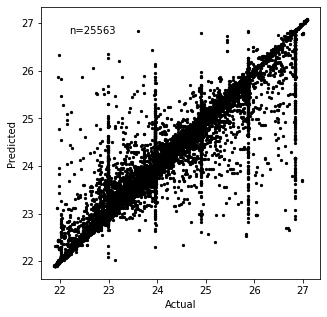

(0.9292957500112555,
 0.11469936756425433,
 0.32595568591758733,
 0.981372563166813)

In [131]:
imp.evaluate(imp.rf_imputed,plot=True)

## ARIMA

In [132]:
imp.arima(order=(2,1,2))

In [133]:
imp.arima_imputed

,co2,pm2p5_mass,tvoc,temperature_c,rh
timestamp,,,,,
2020-06-11 13:52:00,1412.201879,22.713558,123.859636,24.360599,42.064286
2020-06-11 13:54:00,1411.594738,22.796582,126.481339,24.037599,42.061364
2020-06-11 13:56:00,1410.994147,22.721861,129.038577,24.037599,42.058696
2020-06-11 13:58:00,1410.628738,NaN,131.539410,24.148576,42.056250
2020-06-11 14:00:00,1409.933588,22.695872,133.807650,24.176536,42.054000
...,...,...,...,...,...
2020-08-21 13:56:00,722.798423,22.967623,482.896681,24.910003,39.131579
2020-08-21 13:58:00,722.588880,23.259189,481.608827,24.910014,39.111111
2020-08-21 14:00:00,722.321311,23.578982,480.518230,24.910014,39.117647


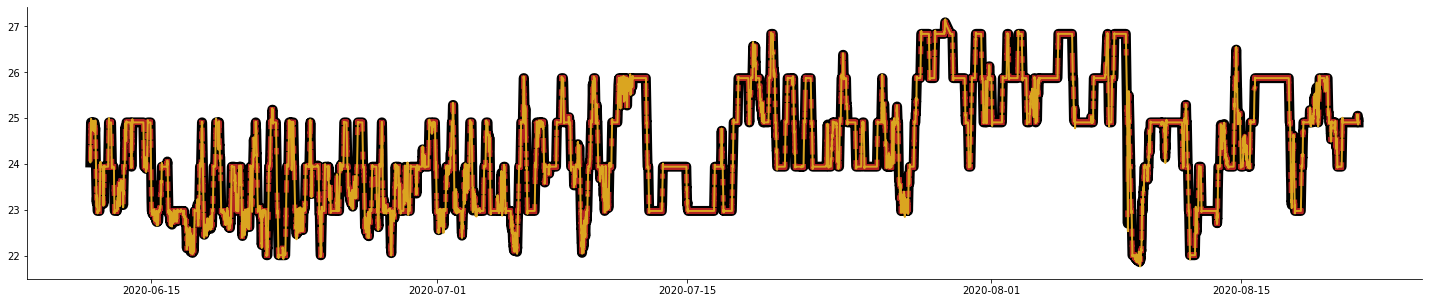

In [134]:
imp.compare_ts(imp.arima_imputed)

# Evaluating

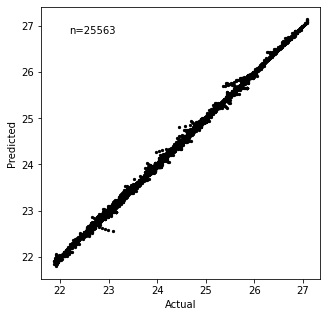

(0.9997104953695201,
 0.00678215381182432,
 0.02085756273623191,
 0.9999276736310058)

In [135]:
imp.evaluate(imp.arima_imputed,plot=True)

# Simulating
Now we can run through multiple iterations of missing data to get a sense of the model's performance.

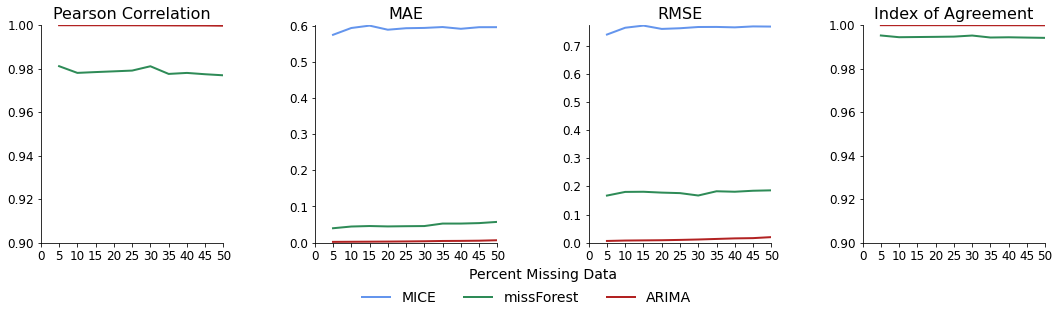

In [136]:
#for param in ["co2","pm2p5_mass","tvoc","temperature_c","rh"]:
res = imp.run_at_random()
imp.compare_methods(res,save=False,annot="")

In [98]:
res

{'MICE': {'Percent': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
  'Pearson Correlation': [0.08942472832360815,
   0.11002626534649462,
   0.12183459949195541,
   0.080674913072587,
   0.08379941898399024,
   0.10553964881674727,
   0.10774129800467669,
   0.08753601684901913,
   0.09188444588960043,
   0.08158767875257567],
  'MAE': [258.56425826524793,
   254.7234434166754,
   247.2553651367972,
   253.09546120369214,
   252.0990651510188,
   249.0299960762595,
   250.67470003062272,
   253.5700114725238,
   256.15043873525013,
   251.0774669853795],
  'RMSE': [320.96924029251494,
   317.72928059761375,
   313.0355785983925,
   318.1254412095509,
   317.81899458360004,
   312.97130633657787,
   314.96603593394155,
   318.4418292927323,
   320.6211190302771,
   317.8010916415374],
  'Index of Agreement': [0.38550413467801614,
   0.4088460103400001,
   0.42353418594254555,
   0.4118775650669507,
   0.40557974472440117,
   0.4194838696293467,
   0.43060328453355734,
   0.4157089285961376,


<div class="alert-block alert alert-success">
    
missForest seems to be the best at least before looking into GANs
    
</div>